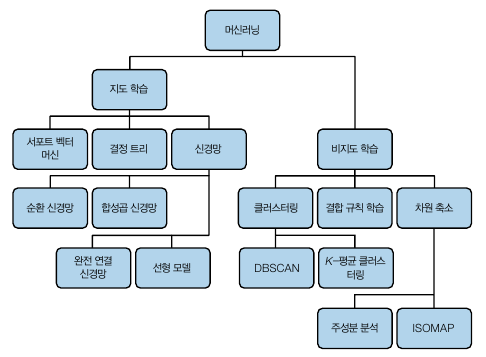

In [1]:
# from sklearn.utils import shuffle
# data = shuffle(data, random_state=value)

##### 스케일링이 필요한 이유
  - ML 프레임워크는 (-1, 1) 내에서  잘 동작하도록 조정된 옵티마이져를 사용
  - 데이터를 -1 ~ 1 범위에서 중앙에 배치하면 오류함수가 더 완만해 진다.
  - 값이 상대적으로 크면 미분값이 커지고 오차가 커진다.
  - 리소스가 감소

In [3]:
import timeit

In [4]:
from sklearn import datasets, linear_model
diabetes_x, diabetes_y = datasets.load_diabetes(return_X_y = True)
raw = diabetes_x[:,None,2]
max_raw = max(raw)
min_raw = min(raw)
scaled = (2*raw - max_raw-min_raw) / (max_raw-min_raw)
def train_raw():
    linear_model.LinearRegression().fit(raw,diabetes_y)
def train_scaled():
    linear_model.LinearRegression().fit(scaled,diabetes_y)

raw_time = timeit.timeit(train_raw, number = 1000)
scaled_time = timeit.timeit(train_scaled, number = 1000)
raw_time, scaled_time

(0.6869884580000871, 0.6545227990000058)

In [5]:
# 일부 알고리즘은 상대적인 크기에 민감하다.
# K-평균 클러스터링 : 거리기반 큰값에 비중을 더 가져간다.

##### 선형 스케일링
  - 최소/최대 스케일링
    - scaled = (2*raw - max_raw-min_raw) / (max_raw-min_raw)
  - 클리핑(최소-최대 스케일링과 함께 사용)
    - 특정범위를 넘어가는 값들을 최소나 최대값으로 대체
    - 최소/최대 스케일링을 적용하기전에 이상치를 -3~3사이로 제한
  - Z 점수 정규화
    - 평균과 표준편차
  - 원저라이징
    - 데이터셋의 경험적 분포를 사용해서 10번째 및 90번째 백분위수에 해당하는 경계로 데이터셋을 클리핑한후에 최대 최소 적용

##### 원-핫 인코딩
  - 변수의 독립성을 유지하면서 카테고리형 변수를 매핑 가장 간단한 방법

##### 더미코딩 vs 원핫 인코딩

##### 리프레이밍
  - 머신러닝의 문제의 출력표현을 바꾸는 방식
  - 회귀문제로 보이는 문제를 분류문제로 간주하거나 분류를 회귀로 처리

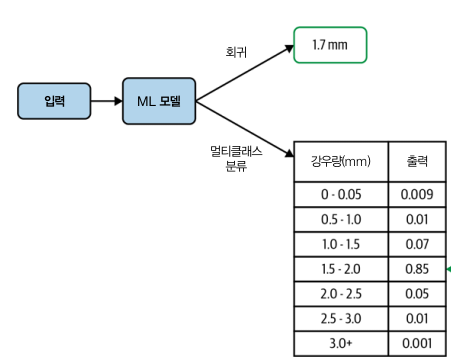

In [ ]:
# 특정지역의 강수율 512-way 카테고리 분류로 예측하는 구글 리서치 논문
# https://arxiv.org/pdf/2003.12140.pdf


In [10]:
import numpy as np
import pandas as pd

In [19]:
data = np.random.randint(1,100,20)
df = pd.DataFrame(data = {
    'value':data
})

# df['value_catetory'] = pd.cut(df['value'], bins=[0,30,60,90,100],labels=['0-30','31-60','61-90','91+'])
df['value_catetory'] = pd.cut(df['value'], bins=[0,30,60,90,100],labels=[0,1,2,3]).astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   value           20 non-null     int64  
 1   value_catetory  20 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 448.0 bytes


##### 예측범위 제한하기
  - 회귀문제에서 실제 출력 3,20 범위에 있다고 가정
  - 선형문제에서는 범위를 벗어나 확률이 항상 존재
  - 범위를 제한 : 시그모이드 함수를 적용(출력)

##### 멀티태스크 학습
  - 신경망에서 하드파라메터 공유, 소프트 파라메터 공유
  - 회귀,분류 서로다른 출력작업에서 파라메터를 공유  

##### 앙상블
  - 베깅 : RandomForestRegressor
  - 부스팅 : GradientBoostingRegressor
  - 스태킹 : 여러모델의 출력을 결합하는 앙상블

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
X, y = load_diabetes(return_X_y=True)
estimators = [
    ('lr', RidgeCV()),
    ('svr', LinearSVR(random_state=42))
]
reg = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=10,
                                          random_state=42)
)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42
)
reg.fit(X_train, y_train).score(X_test, y_test)


데이터 편향
  - 업셈플링
  - 다운셈플링
  - 기타..
    - 타겟의 비율에 맞게 train/ test 데이터를 분할

feature enginering
  - 적절한 feature 선택
    - 머신러닝을 이용해서 best ..    
    - OLS 모델링을 통해서 P-VALUE 0.05 작은거 선택
    - VIF 계수 10이상이면제거
    

  - 새로운 feature 를 발굴
  

##### 딥러닝
  - 전이학습
  - 조기종료
  - 드랍아웃
  - 배치사이즈 적절히 사용
  - 스케줄
  - 정규화
  - 하이퍼파라메터 튜닝 - 옵튜나  